<a href="https://colab.research.google.com/github/kartik-mehra/regression_hackathon/blob/main/EDA_clothing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

KeyboardInterrupt: 

## Reading Amazon Clothing Data

In [ ]:
chunks = pd.read_json('../meta_Clothing_Shoes_and_Jewelry/meta_Clothing_Shoes_and_Jewelry.json', lines=True, chunksize = 100000)

As dataset is huge, we will analyze the first chunk to determine the scope of data that we want to consider

In [ ]:
first_chunk = next(chunks)

In [ ]:
first_chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   category         100000 non-null  object
 1   description      87122 non-null   object
 2   title            99999 non-null   object
 3   brand            69531 non-null   object
 4   feature          91218 non-null   object
 5   rank             95827 non-null   object
 6   date             90272 non-null   object
 7   asin             100000 non-null  object
 8   imageURL         66917 non-null   object
 9   imageURLHighRes  66917 non-null   object
 10  also_view        26006 non-null   object
 11  price            29816 non-null   object
 12  fit              12952 non-null   object
 13  also_buy         14003 non-null   object
 14  main_cat         11203 non-null   object
 15  tech1            592 non-null     object
 16  details          5787 non-null    object
 17  similar_ite

In [ ]:
# print(first_chunk['fit'].dropna().drop_duplicates().values[30])

__Main cloumn to focus will be__:
1. Category -  to select only clothing and apparels
2. Title - Title of the product
3. Brand - Can be used to fitler out highly popular brand
4. Rank - Will be used to priorituze item
5. asin - product id
6. also_buy -  Will be used to create edges
7. imageURLHighRes -  Image data
8. price         
9. Fit - contains reviews related to fits small too small, need to check if can be used  
10. description       

### Keeping ids with image data only


In [ ]:
first_chunk['imageURLHighRes'].head()

0                                                  NaN
1    [https://images-na.ssl-images-amazon.com/image...
2    [https://images-na.ssl-images-amazon.com/image...
3    [https://images-na.ssl-images-amazon.com/image...
4    [https://images-na.ssl-images-amazon.com/image...
Name: imageURLHighRes, dtype: object

In [ ]:
first_chunk = first_chunk[~(first_chunk['imageURLHighRes'].isna())]

In [ ]:
(first_chunk['imageURLHighRes'].str.len()==0).sum()

0

No empty list

## Checking different Categoris available as this a mix data

In [ ]:
categories_split = pd.DataFrame(first_chunk['category'].str[1:4].to_list())
categories_split

,0,1,2
0,Luggage & Travel Gear,Backpacks,Casual Daypacks
1,Luggage & Travel Gear,Backpacks,Kids' Backpacks
2,Luggage & Travel Gear,Backpacks,Kids' Backpacks
3,Novelty & More,Clothing,Novelty
4,Women,Clothing,Swimsuits & Cover Ups
...,...,...,...
66912,Men,Accessories,Hats & Caps
66913,Men,Accessories,Hats & Caps
66914,Women,Watches,Wrist Watches
66915,Women,Accessories,Hats & Caps


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

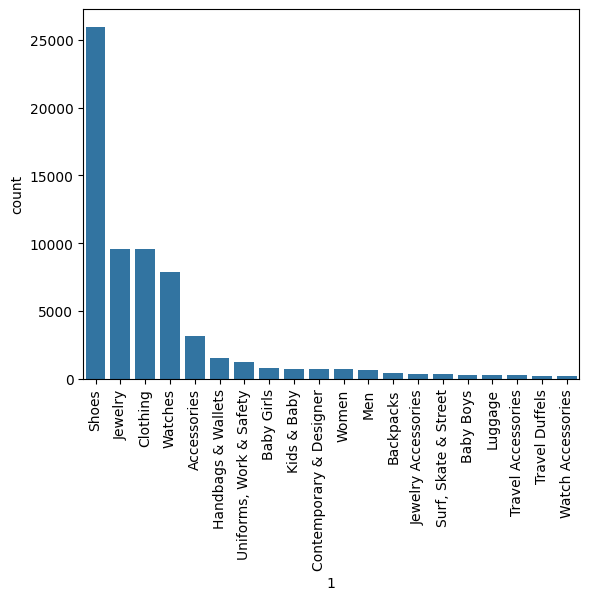

In [ ]:
temp = categories_split[1].value_counts().sort_values(ascending=False).head(20).to_frame().reset_index()

sns.barplot(x=temp[1],y=temp['count'])
plt.xticks(rotation=90)
plt.show()

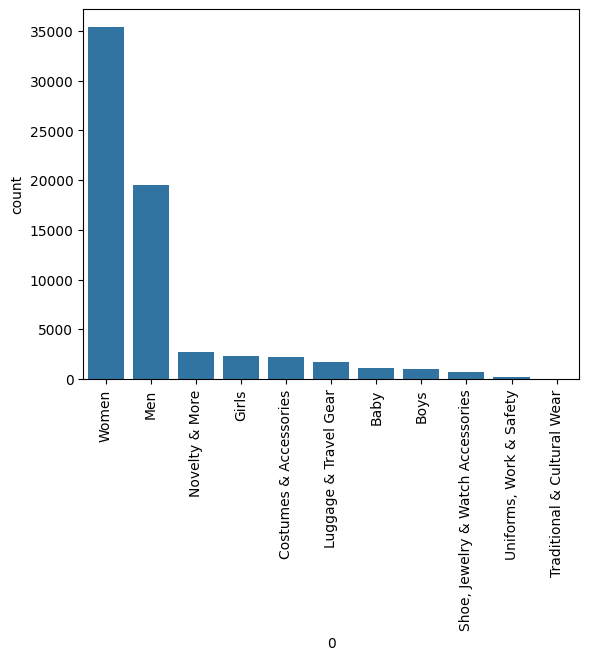

In [ ]:
temp = categories_split[0].value_counts().sort_values(ascending=False).head(20).to_frame().reset_index()

sns.barplot(x=temp[0],y=temp['count'])
plt.xticks(rotation=90)
plt.show()

__For this research we will only consider women__

In [ ]:
first_chunk = first_chunk[first_chunk['category'].str[1] == 'Women']

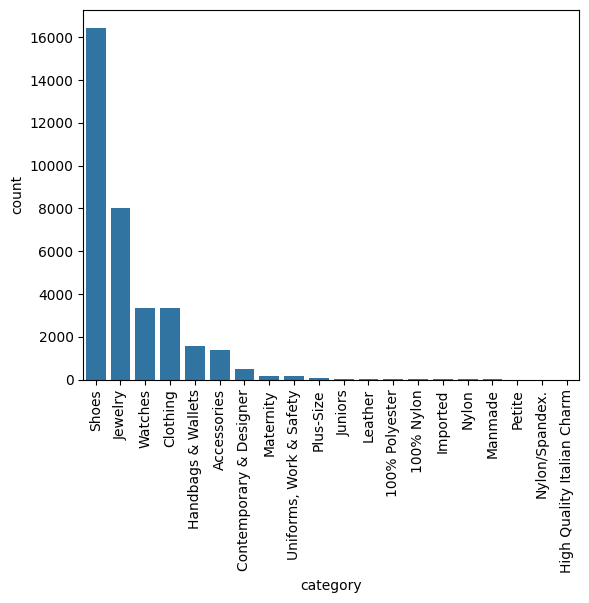

In [ ]:
temp = first_chunk.category.str[2].value_counts().sort_values(ascending=False).head(20).to_frame().reset_index()

sns.barplot(x=temp['category'],y=temp['count'])
plt.xticks(rotation=90)
plt.show()

__And only try recommendation on clothing__

## Filter dataset for recommendation engine

In [ ]:
import pandas as pd

In [ ]:
chunks = pd.read_json('../meta_Clothing_Shoes_and_Jewelry/meta_Clothing_Shoes_and_Jewelry.json', lines=True, chunksize = 100000)

In [ ]:
df = pd.DataFrame()
for first_chunk in chunks:
    first_chunk['sub_cat'] = first_chunk.category.str[1:3]
    first_chunk = first_chunk[(first_chunk['sub_cat'].str[0].isin(['Women','Men'])) & (first_chunk['sub_cat'].str[1].isin(['Clothing']))]
    first_chunk = first_chunk[~(first_chunk['imageURLHighRes'].isna())]
    df = pd.concat([df,first_chunk])

KeyboardInterrupt: 

In [ ]:
# df = pd.DataFrame()
# for first_chunk in chunks:
#     first_chunk['sub_cat'] = first_chunk.category.str[1:3]
#     first_chunk = first_chunk[(first_chunk['sub_cat'].str[0].isin(['Women'])) & (first_chunk['sub_cat'].str[1].isin(['Clothing']))]
#     first_chunk = first_chunk[~(first_chunk['imageURLHighRes'].isna())]
#     df = pd.concat([df,first_chunk])

In [ ]:
df['rank'] = df['rank'].astype(str)
df.to_parquet('../processed/meta_Clothing_Shoes_and_Jewelry_2018_women_men_clothing_only.parquet')

In [ ]:
(df.category.str[1]=='Women').sum()

328180

In [ ]:
df.shape

(328180, 20)

In [ ]:
df = pd.read_parquet('../processed/meta_Clothing_Shoes_and_Jewelry_2018_women_men_clothing_only.parquet')

## EDA on Women Clothing

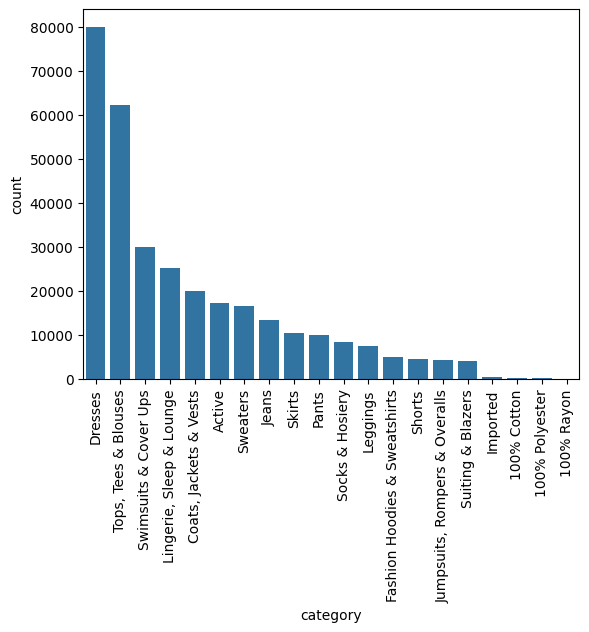

In [ ]:
temp = df.category.str[3].value_counts().sort_values(ascending=False).head(20).to_frame().reset_index()

sns.barplot(x=temp['category'],y=temp['count'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.category.str[3].value_counts().head(10)

category
Dresses                     80090
Tops, Tees & Blouses        62257
Swimsuits & Cover Ups       30053
Lingerie, Sleep & Lounge    25258
Coats, Jackets & Vests      19984
Active                      17275
Sweaters                    16667
Jeans                       13376
Skirts                      10436
Pants                       10028
Name: count, dtype: int64

In [ ]:
df['clothing_type'] = df.category.str[3]

In [ ]:
df[['asin','clothing_type']].drop_duplicates().shape,df.asin.nunique()

((327966, 2), 327966)

In [ ]:
exploded_df = df.explode('also_buy')
exploded_df[exploded_df.also_buy.isin(dresses.asin.unique())].shape,dresses.asin.nunique()

((29551, 21), 202794)

### checking what are the top pairs bought together

In [ ]:
bought_together = df.explode('also_buy')
## removing products that does not have also bought
bought_together = bought_together[~bought_together.also_buy.isna()]
bought_together = bought_together[['asin','also_buy']].drop_duplicates()

In [ ]:
clothing_type = df[['asin','clothing_type']].drop_duplicates()

In [ ]:
pairs = pd.merge(bought_together,clothing_type,on='asin')

In [ ]:
pairs = pairs.rename(columns = {'clothing_type':'clothing_type_asin'})

In [ ]:
pairs = pd.merge(pairs,clothing_type,left_on='also_buy',right_on='asin',suffixes=('','_y'))

In [ ]:
pairs = pairs.rename(columns = {'clothing_type':'clothing_type_also_buy'}).drop(columns = ['asin_y'])

In [ ]:
final_categories = pairs.groupby(['clothing_type_asin','clothing_type_also_buy']).asin.count().sort_values(ascending=False).to_frame().head(50).reset_index().head(20)
final_categories

,clothing_type_asin,clothing_type_also_buy,asin
0,Dresses,Dresses,9476
1,"Lingerie, Sleep & Lounge","Lingerie, Sleep & Lounge",6326
2,"Tops, Tees & Blouses","Tops, Tees & Blouses",6110
3,Swimsuits & Cover Ups,Swimsuits & Cover Ups,2244
4,Socks & Hosiery,Socks & Hosiery,2139
5,Active,Active,1426
6,Skirts,Skirts,1378
7,Jeans,Jeans,1365
8,Pants,Pants,1172
9,Sweaters,Sweaters,957


In [ ]:
final_categories = list(set(final_categories.clothing_type_also_buy) | set(final_categories.clothing_type_asin))

In [ ]:
final_categories

['Tops, Tees & Blouses',
 'Swimsuits & Cover Ups',
 'Dresses',
 'Skirts',
 'Leggings',
 'Socks & Hosiery',
 'Jeans',
 'Lingerie, Sleep & Lounge',
 'Sweaters',
 'Active',
 'Coats, Jackets & Vests',
 'Pants']

In [ ]:
filtered_categories_df = df[df.clothing_type.isin(final_categories)]

In [ ]:
filtered_categories_df.clothing_type.value_counts()

clothing_type
Dresses                     80090
Tops, Tees & Blouses        62257
Swimsuits & Cover Ups       30053
Lingerie, Sleep & Lounge    25258
Coats, Jackets & Vests      19984
Active                      17275
Sweaters                    16667
Jeans                       13376
Skirts                      10436
Pants                       10028
Socks & Hosiery              8393
Leggings                     7430
Name: count, dtype: int64

In [ ]:
bought_together = filtered_categories_df.explode('also_buy')
## removing products that does not have also bought
bought_together = bought_together[~bought_together.also_buy.isna()]
bought_together = bought_together[bought_together.also_buy.isin(filtered_categories_df.asin.unique())]
bought_together = bought_together[['asin','also_buy']].drop_duplicates()

In [ ]:
bought_together.shape,filtered_categories_df.asin.nunique()

((47538, 2), 301039)

In [ ]:
filtered_categories_df.to_parquet('../processed/final_filtered_meta_Clothing_Shoes_and_Jewelry_2018_women_clothing_only.parquet')

## EDA on Men

In [ ]:
men_df = df[(df.category.str[1]=='Men')]

In [ ]:
temp = men_df.category.str[3].value_counts().sort_values(ascending=False).head(20).to_frame().reset_index()

sns.barplot(x=temp['category'],y=temp['count'])
plt.xticks(rotation=90)
plt.show()

NameError: name 'sns' is not defined

In [ ]:
men_df['clothing_type'] = men_df.category.str[3]

C:\Users\Acer\AppData\Local\Temp\ipykernel_12628\513165044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_df['clothing_type'] = men_df.category.str[3]


### checking what are the top pairs bought together

In [ ]:
bought_together = men_df.explode('also_buy')
## removing products that does not have also bought
bought_together = bought_together[~bought_together.also_buy.isna()]
bought_together = bought_together[['asin','also_buy']].drop_duplicates()

In [ ]:
clothing_type = men_df[['asin','clothing_type']].drop_duplicates()

In [ ]:
pairs = pd.merge(bought_together,clothing_type,on='asin')

In [ ]:
pairs = pairs.rename(columns = {'clothing_type':'clothing_type_asin'})

In [ ]:
pairs = pd.merge(pairs,clothing_type,left_on='also_buy',right_on='asin',suffixes=('','_y'))

In [ ]:
pairs = pairs.rename(columns = {'clothing_type':'clothing_type_also_buy'}).drop(columns = ['asin_y'])

In [ ]:
final_categories = pairs.groupby(['clothing_type_asin','clothing_type_also_buy']).asin.count().sort_values(ascending=False).to_frame().head(50).reset_index().head(20)
final_categories

,clothing_type_asin,clothing_type_also_buy,asin
0,Shirts,Shirts,4187
1,Underwear,Underwear,2546
2,Active,Active,2504
3,Jackets & Coats,Jackets & Coats,1855
4,Pants,Pants,1200
5,Jeans,Jeans,931
6,Shirts,Pants,714
7,Shirts,Active,619
8,Shorts,Shorts,611
9,Socks,Socks,610


In [ ]:
final_categories = list(set(final_categories.clothing_type_also_buy) | set(final_categories.clothing_type_asin))

In [ ]:
final_categories

['Jeans',
 'Active',
 'Sleep & Lounge',
 'Underwear',
 'Jackets & Coats',
 'Shorts',
 'Swim',
 'Pants',
 'Socks',
 'Shirts']

In [ ]:
filtered_categories_df = men_df[men_df.clothing_type.isin(final_categories)]

In [ ]:
filtered_categories_df.clothing_type.value_counts()

clothing_type
Shirts             36052
Active             18885
Jackets & Coats    14528
Underwear          10307
Jeans               5281
Pants               5133
Sleep & Lounge      4675
Socks               4167
Swim                3981
Shorts              3622
Name: count, dtype: int64

In [ ]:
bought_together = filtered_categories_df.explode('also_buy')
## removing products that does not have also bought
bought_together = bought_together[~bought_together.also_buy.isna()]
bought_together = bought_together[bought_together.also_buy.isin(filtered_categories_df.asin.unique())]
bought_together = bought_together[['asin','also_buy']].drop_duplicates()

In [ ]:
bought_together.shape,men_df.asin.nunique()

((26471, 2), 120910)

1523

In [ ]:
filtered_categories_df.to_parquet('../processed/final_filtered_meta_Clothing_Shoes_and_Jewelry_2018_men_clothing_only.parquet')

In [ ]:
import os

NameError: name 'filtered_categories_df' is not defined

## Image Download

In [ ]:
import pandas as pd
import numpy as np
import urllib.request
from tqdm import tqdm
import requests
import os

In [ ]:
img_list = filtered_categories_df.drop_duplicates('asin').set_index('asin').imageURLHighRes.to_dict()

In [ ]:
filtered_categories_df.imageURLHighRes.str.len().value_counts()

imageURLHighRes
1     114938
2      65669
3      35515
4      23173
6      19924
5      16164
7       4316
8       3123
9       2501
10      2208
11      1741
12      1416
13      1249
14       984
15       819
16       794
19       601
17       583
18       565
21       517
20       464
22       441
23       391
24       356
27       255
25       249
26       234
36       187
28       172
29       143
31       131
32       125
40       124
30       122
34       114
39       110
33       108
38        94
41        90
35        90
37        83
43        80
42        60
44        47
47        46
46        45
45        39
48        18
49        18
50        11
Name: count, dtype: int64

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [ ]:
def save_img_sel(driver,url,name,loc):
    #launch URL
    driver.get('data:,')
    driver.get(url)
    element = WebDriverWait(driver, 1).until(
            EC.presence_of_element_located((By.TAG_NAME, "img"))
        )
    #open file in write and binary mode
    os.makedirs(os.path.dirname(loc), exist_ok=True)
    with open(f"{loc}/{name}.jpg", 'wb') as file:
        #identify image to be captured
        l = driver.find_element(By.TAG_NAME, "img")
        #write file
        file.write(l.screenshot_as_png)
        #close browserda

In [ ]:
driver = webdriver.Chrome()
failed_list = {}
driver.implicitly_wait(0.5)
for i in tqdm(img_list):
    path = f'./processed/images/{i}'
    if not os.path.exists(path):
        os.makedirs(path)
    for ind,val in enumerate(remaining_ids[i]):
        success_count = 0
        try:
            save_img_sel(driver, str(val),ind+1,path)
            ## only download 2 image
            success_count+=1
            if(success_count==2):
                continue
        except Exception as e:
            # print("Error:", e,path,val)
            if i in failed_list:
                failed_list[i].append(val)
            else:
                failed_list[i] = [val]